In [153]:
#for dealing with dataframes
import pandas as pd
#for dealing with arrays and math functions
import numpy as np
#for datetime format
import datetime as dt
from datetime import datetime

#for plotting
import matplotlib.pyplot as plt
%matplotlib inline

#not sure what this module exactly does but I think its for visualising and the second part\
#you need for portfolio optimisation and efficietn frontier
import cvxopt as opt 
from cvxopt import blas, solvers

#if i decide to use datareader
import pandas_datareader as pdr
from pandas_datareader import data, wb
#if i decide to use yahoo finance
import yfinance as yf

# 1. Import data - 1.1.2018 until today

In [154]:
#specify companies and time period
#I have chosen 9 companies that some should be positively / negatively correlated
symbols = ["MSFT","INTC", "AMZN", "EBAY", "AAPL", "GOOG", "FB", "TSLA", "GE"]
start_date = datetime(2018,1,1)
end_date = datetime.today()
#installed function in datareader so that you dont need to use API
stock_data = pdr.get_data_yahoo(symbols, start_date, end_date)

In [155]:
#Adjusted Close price is closing price adjusted for corporate actions such as stock splits and divs
adjusted_closing_price = stock_data['Adj Close']
adjusted_closing_price

Symbols,AAPL,AMZN,EBAY,FB,GE,GOOG,INTC,MSFT,TSLA
Date,,,,,,,,,
2018-01-02,166.353714,1189.010010,37.187477,181.419998,16.684486,1065.000000,44.119904,82.798996,320.529999
2018-01-03,166.324722,1204.199951,38.320892,184.669998,16.842239,1082.479980,42.622555,83.184326,317.250000
2018-01-04,167.097290,1209.589966,37.685787,184.330002,17.194864,1086.400024,41.840923,83.916473,314.619995
2018-01-05,168.999741,1229.140015,38.780113,186.850006,17.204138,1102.229980,42.132858,84.956886,316.579987
2018-01-08,168.372040,1246.869995,38.887589,188.279999,16.962873,1106.939941,42.132858,85.043571,336.410004
2018-01-09,168.352722,1252.699951,38.623779,187.869995,17.222698,1106.260010,41.078125,84.985786,333.690002
2018-01-10,168.314102,1254.329956,36.835732,187.839996,17.566038,1102.609985,40.023396,84.600449,334.799988
2018-01-11,169.270157,1276.680054,36.943211,187.770004,17.649551,1105.520020,40.880363,84.850906,337.950012
2018-01-12,171.018112,1305.199951,37.148396,179.369995,17.408283,1122.260010,40.720272,86.315178,336.220001


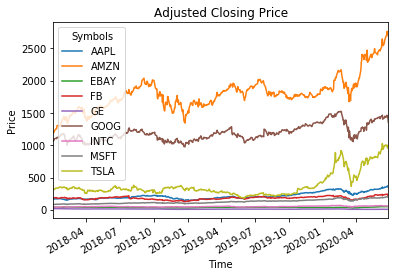

In [156]:
#test plotting Adjusted Closing price from the dataframe
adjusted_closing_price.plot()
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Adjusted Closing Price')
plt.show()
#Nice pump on Amazon and Tesla

# 2. Calculating Financial Statistics

## 2.1. Daily simple return over time

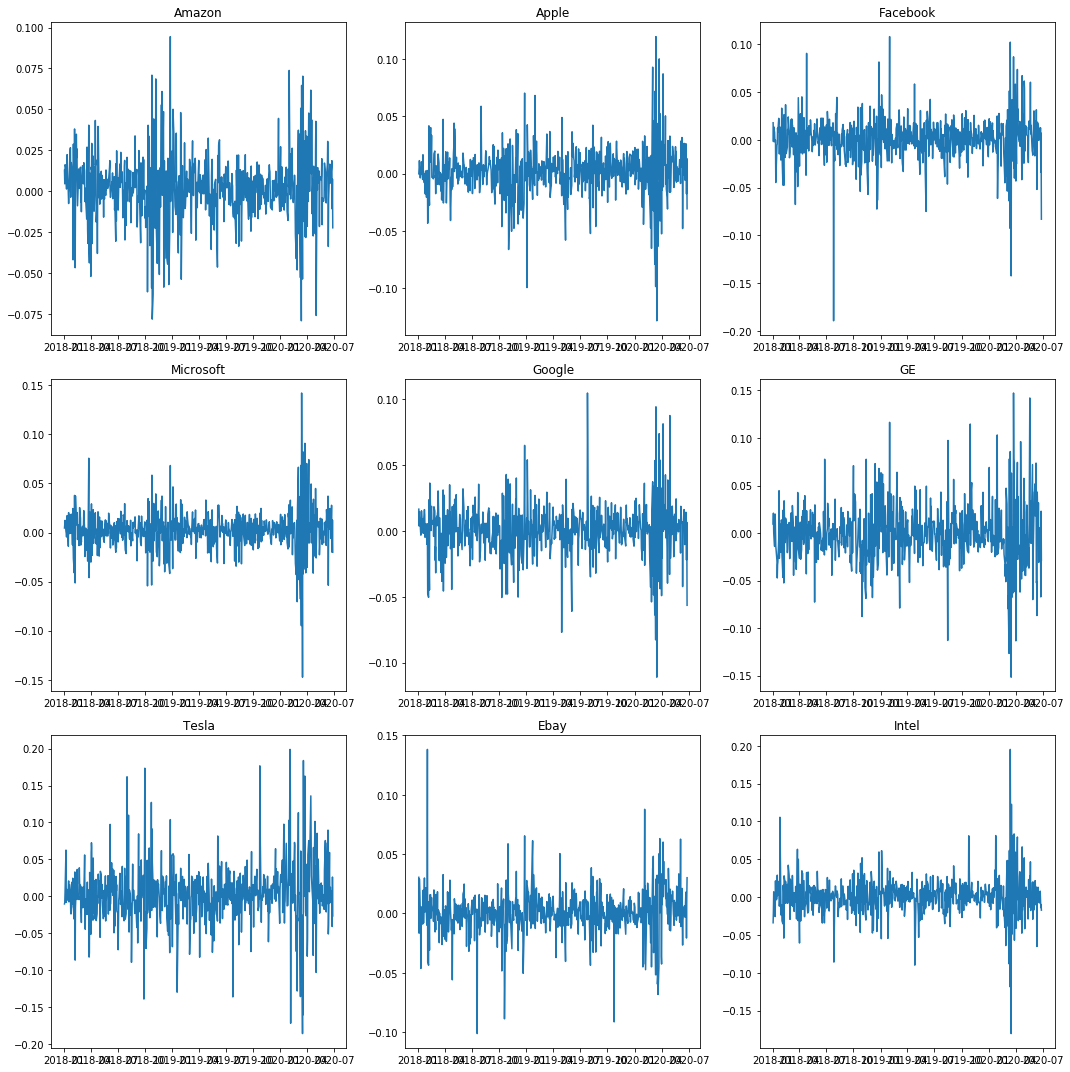

In [157]:
#This is pretty useless
#Would like to know how I can adjusts the ticklabels in the individual subplots

fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(331)
ax2 = fig.add_subplot(332)
ax3 = fig.add_subplot(333)
ax4 = fig.add_subplot(334)
ax5 = fig.add_subplot(335)
ax6 = fig.add_subplot(336)
ax7 = fig.add_subplot(337)
ax8 = fig.add_subplot(338)
ax9 = fig.add_subplot(339)
ax1.plot(stock_data['Adj Close']['AMZN'].pct_change())
ax1.set_title("Amazon")
ax2.plot(stock_data['Adj Close']['AAPL'].pct_change())
ax2.set_title("Apple")
ax3.plot(stock_data['Adj Close']['FB'].pct_change())
ax3.set_title("Facebook")
ax4.plot(stock_data['Adj Close']['MSFT'].pct_change())
ax4.set_title("Microsoft")
ax5.plot(stock_data['Adj Close']['GOOG'].pct_change())
ax5.set_title("Google")
ax6.plot(stock_data['Adj Close']['GE'].pct_change())
ax6.set_title("GE")
ax7.plot(stock_data['Adj Close']['TSLA'].pct_change())
ax7.set_title("Tesla")
ax8.plot(stock_data['Adj Close']['EBAY'].pct_change())
ax8.set_title("Ebay")
ax9.plot(stock_data['Adj Close']['INTC'].pct_change())
ax9.set_title("Intel")
plt.tight_layout()
plt.show()

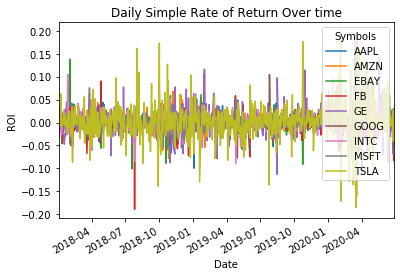

<Figure size 1152x648 with 0 Axes>

In [158]:
stock_data_daily_returns = stock_data['Adj Close'].pct_change()
stock_data_daily_returns.plot()
plt.xlabel("Date")
plt.ylabel("ROI")
plt.title("Daily Simple Rate of Return Over time")
plt.figure(figsize=(16,9))
plt.show()

Text(0, 0.5, '% mean daily change')

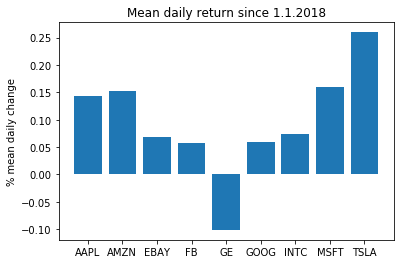

In [159]:
# calculate daily mean
daily_mean = stock_data_daily_returns.mean()
daily_mean
# GE is the only one that on average lost money in the period since the beginning of 2018

x = stock_data_daily_returns.keys()
plt.bar(x, daily_mean*100)
plt.title('Mean daily return since 1.1.2018')
plt.ylabel('% mean daily change')

## 2.2. Risk - variance and standard deviation

Text(0.5, 1.0, 'Variance since 1.1.2018')

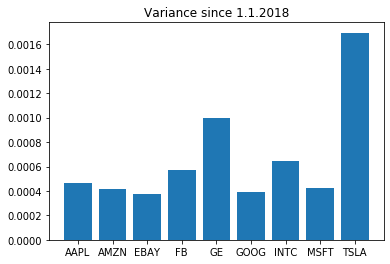

In [160]:
stock_variance = stock_data_daily_returns.var()
stock_variance

x = stock_data_daily_returns.keys()
plt.bar(x, stock_variance)
plt.title('Variance since 1.1.2018')

Text(0.5, 1.0, 'Standard dev since 1.1.2018')

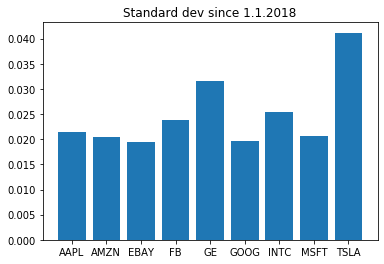

In [161]:
stock_std = stock_data_daily_returns.std()
stock_std

x = stock_data_daily_returns.keys()
plt.bar(x, stock_std)
plt.title('Standard dev since 1.1.2018')

In [162]:
stock_correlation = stock_data_daily_returns.corr()
stock_correlation

Symbols,AAPL,AMZN,EBAY,FB,GE,GOOG,INTC,MSFT,TSLA
Symbols,,,,,,,,,
AAPL,1.000000,0.648500,0.489403,0.617418,0.458901,0.746786,0.677622,0.796723,0.406417
AMZN,0.648500,1.000000,0.406675,0.615330,0.316077,0.698653,0.539268,0.734277,0.376762
EBAY,0.489403,0.406675,1.000000,0.378867,0.282598,0.461843,0.424431,0.515878,0.229480
FB,0.617418,0.615330,0.378867,1.000000,0.380349,0.714551,0.531909,0.667308,0.338474
GE,0.458901,0.316077,0.282598,0.380349,1.000000,0.412065,0.365344,0.436793,0.274926
GOOG,0.746786,0.698653,0.461843,0.714551,0.412065,1.000000,0.635287,0.817318,0.386311
INTC,0.677622,0.539268,0.424431,0.531909,0.365344,0.635287,1.000000,0.734658,0.352712
MSFT,0.796723,0.734277,0.515878,0.667308,0.436793,0.817318,0.734658,1.000000,0.434972
TSLA,0.406417,0.376762,0.229480,0.338474,0.274926,0.386311,0.352712,0.434972,1.000000


In [163]:
stock_covariance = stock_data_daily_returns.cov()
stock_covariance

Symbols,AAPL,AMZN,EBAY,FB,GE,GOOG,INTC,MSFT,TSLA
Symbols,,,,,,,,,
AAPL,0.000462,0.000285,0.000204,0.000317,0.000312,0.000316,0.000369,0.000352,0.000360
AMZN,0.000285,0.000418,0.000161,0.000300,0.000204,0.000281,0.000280,0.000309,0.000317
EBAY,0.000204,0.000161,0.000375,0.000175,0.000173,0.000176,0.000208,0.000205,0.000183
FB,0.000317,0.000300,0.000175,0.000570,0.000287,0.000336,0.000322,0.000328,0.000333
GE,0.000312,0.000204,0.000173,0.000287,0.000999,0.000257,0.000293,0.000284,0.000358
GOOG,0.000316,0.000281,0.000176,0.000336,0.000257,0.000388,0.000317,0.000331,0.000313
INTC,0.000369,0.000280,0.000208,0.000322,0.000293,0.000317,0.000643,0.000383,0.000368
MSFT,0.000352,0.000309,0.000205,0.000328,0.000284,0.000331,0.000383,0.000423,0.000369
TSLA,0.000360,0.000317,0.000183,0.000333,0.000358,0.000313,0.000368,0.000369,0.001695


## 3. Mean-Variance Portfolio Optimisation

## 3.1. Copy paste "return_portfolios" and "optimal_portfolio" fn's

In [164]:
import random

def return_portfolios(expected_returns, cov_matrix):
  np.random.seed(1)
  port_returns = []
  port_volatility = []
  stock_weights = []
    
  selected = (expected_returns.axes)[0]
  #this specifies the number of random portfolios generated  
  num_assets = len(selected) 
  num_portfolios = 50000
    
  for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, expected_returns)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)
    
    portfolio = {'Returns': port_returns,
                 'Volatility': port_volatility}
    
  for counter,symbol in enumerate(selected):
    portfolio[symbol +' Weight'] = [Weight[counter] for Weight in stock_weights]
    
  df = pd.DataFrame(portfolio)
    
  column_order = ['Returns', 'Volatility'] + [stock+' Weight' for stock in selected]
    
  df = df[column_order]
   
  return df

In [165]:
def optimal_portfolio(returns):
    n = returns.shape[1]
    returns = np.transpose(returns.values)

    N = 10
    mus = [10**(5.0 * t/N - 1.0) for t in range(N)]

    # Convert to cvxopt matrices
    S = opt.matrix(np.cov(returns))
    pbar = opt.matrix(np.mean(returns, axis=1))

    # Create constraint matrices
    G = -opt.matrix(np.eye(n))   # negative n x n identity matrix
    h = opt.matrix(0.0, (n ,1))
    A = opt.matrix(1.0, (1, n))
    b = opt.matrix(1.0)

    # Calculate efficient frontier weights using quadratic programming
    portfolios = [solvers.qp(mu*S, -pbar, G, h, A, b)['x'] for mu in mus]
    
    ## CALCULATE RISKS AND RETURNS FOR FRONTIER
    returns = [blas.dot(pbar, x) for x in portfolios]
    risks = [np.sqrt(blas.dot(x, S*x)) for x in portfolios]
    ## CALCULATE THE 2ND DEGREE POLYNOMIAL OF THE FRONTIER CURVE
    m1 = np.polyfit(returns, risks, 2)
    x1 = np.sqrt(m1[2] / m1[0])
    # CALCULATE THE OPTIMAL PORTFOLIO
    wt = solvers.qp(opt.matrix(x1 * S), -pbar, G, h, A, b)['x']
    return np.asarray(wt), returns, risks

## 3.2. Plot random and optimised portfolios

In [166]:
random_portfolios = return_portfolios(daily_mean, stock_covariance)
print(random_portfolios.head().round(4))

   Returns  Volatility  AAPL Weight  AMZN Weight  EBAY Weight  FB Weight  \
0   0.0013      0.0192       0.1599       0.2763       0.0000     0.1159   
1   0.0009      0.0186       0.1225       0.0953       0.1557     0.0465   
2   0.0008      0.0178       0.0283       0.0399       0.1611     0.1948   
3   0.0008      0.0175       0.0095       0.0414       0.2139     0.0240   
4   0.0007      0.0185       0.1320       0.1605       0.0035     0.1443   

   GE Weight  GOOG Weight  INTC Weight  MSFT Weight  TSLA Weight  
0     0.0563       0.0354       0.0714       0.1325       0.1522  
1     0.1996       0.0062       0.1524       0.0948       0.1270  
2     0.0631       0.1393       0.1764       0.1800       0.0171  
3     0.1026       0.2334       0.1299       0.1685       0.0769  
4     0.1902       0.1439       0.0539       0.1518       0.0199  


In [167]:
weights, returns, risks = optimal_portfolio(stock_data_daily_returns[1:]) 

     pcost       dcost       gap    pres   dres
 0: -9.6083e-04 -1.0026e+00  1e+00  2e-16  3e+00
 1: -9.6255e-04 -1.2567e-02  1e-02  1e-16  4e-02
 2: -1.0888e-03 -2.6634e-03  2e-03  6e-17  5e-03
 3: -2.2497e-03 -3.4338e-03  1e-03  1e-16  2e-03
 4: -2.4805e-03 -2.5231e-03  4e-05  2e-16  8e-05
 5: -2.5135e-03 -2.5140e-03  4e-07  1e-16  8e-07
 6: -2.5139e-03 -2.5139e-03  4e-09  1e-16  8e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -9.2509e-04 -1.0025e+00  1e+00  4e-16  3e+00
 1: -9.2679e-04 -1.2499e-02  1e-02  2e-16  4e-02
 2: -1.0510e-03 -2.5874e-03  2e-03  1e-16  5e-03
 3: -2.2096e-03 -3.3379e-03  1e-03  2e-16  1e-03
 4: -2.3127e-03 -2.3407e-03  3e-05  1e-16  3e-05
 5: -2.3304e-03 -2.3307e-03  3e-07  1e-16  3e-07
 6: -2.3306e-03 -2.3306e-03  3e-09  3e-16  3e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -8.1208e-04 -1.0023e+00  1e+00  1e-16  3e+00
 1: -8.1372e-04 -1.2284e-02  1e-02  8e-17  4e-02
 2: -9.3219e-04 -2.3497e

In [168]:
stock_data_noGE = pdr.get_data_yahoo(["MSFT","INTC", "AMZN", "EBAY", "AAPL", "GOOG", "FB", "GE"], start_date, end_date)
stock_data_daily_returns_noGE = stock_data_noGE['Adj Close'].pct_change()
weights_noGE, returns_noGE, risks_noGE = optimal_portfolio(stock_data_daily_returns_noGE[1:]) 

     pcost       dcost       gap    pres   dres
 0: -7.5526e-04 -1.0016e+00  1e+00  1e-16  3e+00
 1: -7.5647e-04 -1.1577e-02  1e-02  2e-16  3e-02
 2: -8.5064e-04 -1.6763e-03  8e-04  8e-17  3e-03
 3: -1.5167e-03 -1.8574e-03  3e-04  2e-16  4e-04
 4: -1.5573e-03 -1.5758e-03  2e-05  3e-17  2e-05
 5: -1.5725e-03 -1.5729e-03  3e-07  3e-16  2e-07
 6: -1.5728e-03 -1.5728e-03  3e-09  2e-16  2e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -7.2181e-04 -1.0015e+00  1e+00  1e-16  3e+00
 1: -7.2303e-04 -1.1539e-02  1e-02  2e-16  3e-02
 2: -8.1741e-04 -1.6381e-03  8e-04  1e-16  3e-03
 3: -1.4761e-03 -1.8069e-03  3e-04  1e-16  4e-04
 4: -1.5130e-03 -1.5308e-03  2e-05  3e-16  2e-05
 5: -1.5263e-03 -1.5271e-03  7e-07  2e-16  7e-08
 6: -1.5270e-03 -1.5270e-03  8e-09  3e-16  7e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -6.1606e-04 -1.0014e+00  1e+00  1e-16  3e+00
 1: -6.1730e-04 -1.1421e-02  1e-02  2e-16  3e-02
 2: -7.1251e-04 -1.5175e

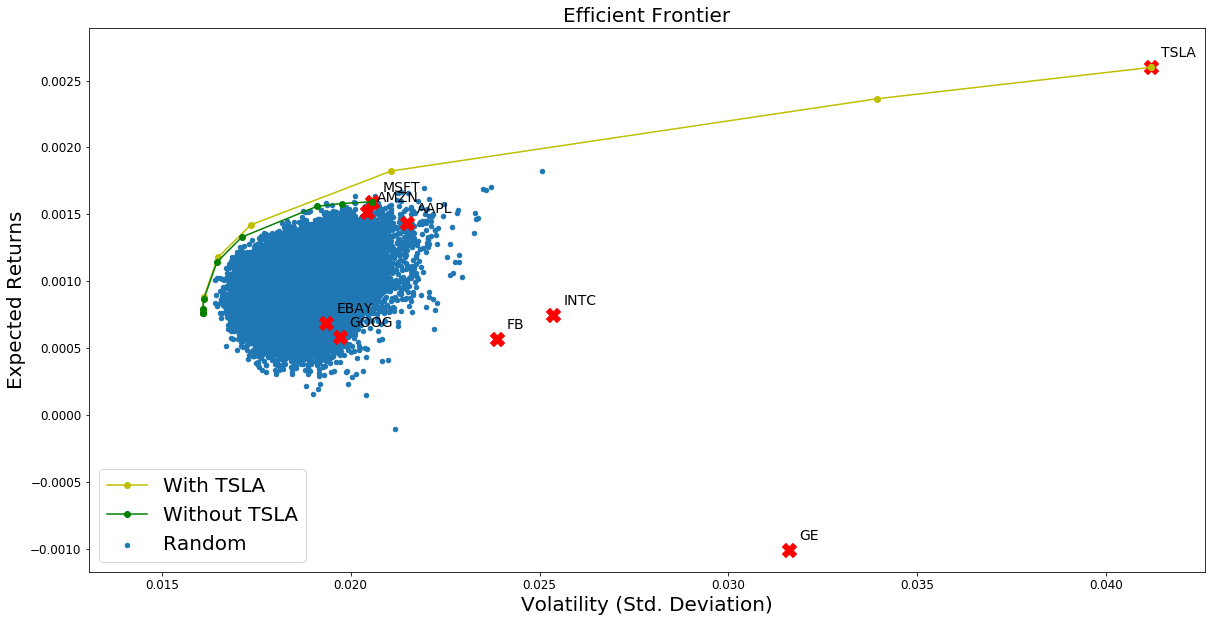

In [169]:
random_portfolios.plot.scatter(x='Volatility', y='Returns', fontsize = 12, figsize=(20,10))
plt.margins(x=0.05, y=-0.3)
plt.xlabel('Volatility (Std. Deviation)', fontsize = 20)
plt.ylabel('Expected Returns', fontsize = 20)
plt.title('Efficient Frontier', fontsize = 20)

#How to put labels right next to the spots?
single_asset_std=np.sqrt(np.diagonal(stock_covariance))
plt.scatter(single_asset_std,daily_mean,marker='X',color='red',s=200)
for i, txt in enumerate(stock_data_daily_returns.keys()):
    plt.annotate(txt, (single_asset_std[i], daily_mean[i]), size=14, xytext=(10,10), ha='left', textcoords='offset points')
       
plt.plot(risks, returns, 'y-o')
plt.plot(risks_noGE, returns_noGE, 'g-o')
plt.legend(['With TSLA', 'Without TSLA', 'Random'], fontsize = 20, loc="lower left")

plt.show()

## 3.3. High risk vs low risk optimal portfolio

In [170]:
print(weights.shape)

(9, 1)


In [171]:
print(weights, returns, risks)

[[1.86348035e-07]
 [1.22397506e-07]
 [3.28402072e-07]
 [3.23031459e-07]
 [2.14058509e-07]
 [3.23860368e-07]
 [3.29910710e-07]
 [3.91413652e-08]
 [9.99998133e-01]] [0.002598644005099079, 0.002598645277783932, 0.002364346095706317, 0.001824123371353748, 0.0014212689299081243, 0.0011777310914195631, 0.0008849898762163543, 0.0007940815463398593, 0.0007660574141121102, 0.0007592189587283769] [0.04117401693448436, 0.04117403817816831, 0.03393572363015845, 0.021073647960522583, 0.01735812390160076, 0.01648415942980159, 0.01612211112118124, 0.016084965489654338, 0.01608129351728404, 0.0160810012920707]


In [128]:
print(weights.shape)

(9, 1)


In [245]:
print(random_portfolios.head())
print(random_portfolios.shape)

    Returns  Volatility  AAPL Weight  AMZN Weight  EBAY Weight  FB Weight  \
0  0.001339    0.019211     0.159933     0.276254     0.000044   0.115948   
1  0.000851    0.018643     0.122468     0.095279     0.155744   0.046470   
2  0.000804    0.017768     0.028251     0.039865     0.161139   0.194849   
3  0.000835    0.017457     0.009514     0.041372     0.213924   0.023958   
4  0.000743    0.018534     0.132031     0.160519     0.003517   0.144271   

   GE Weight  GOOG Weight  INTC Weight  MSFT Weight  TSLA Weight  
0   0.056283     0.035413     0.071433     0.132527     0.152165  
1   0.199588     0.006225     0.152391     0.094850     0.126985  
2   0.063072     0.139320     0.176361     0.180027     0.017114  
3   0.102586     0.233351     0.129884     0.168548     0.076863  
4   0.190183     0.143891     0.053936     0.151798     0.019853  
(50000, 11)


In [248]:
for i in range(50000):
    if random_portfolios.Volatility[i] < 0.0175 and random_portfolios.Returns[i] > 0.0013:
        print(random_portfolios.iloc[[i]])
  #   print(random_portfolios)
#print(random_portfolios[(random_portfolios.Volatility < 0.0166) and (random_portfolios.Returns > 0.001)])

        Returns  Volatility  AAPL Weight  AMZN Weight  EBAY Weight  FB Weight  \
30352  0.001305    0.017383     0.116075     0.333484     0.171699   0.036003   

       GE Weight  GOOG Weight  INTC Weight  MSFT Weight  TSLA Weight  
30352    0.03446     0.010296     0.015781     0.221968     0.060235  
